In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
!pip install livelossplot

In [3]:
from livelossplot import PlotLossesKeras

## Streak case

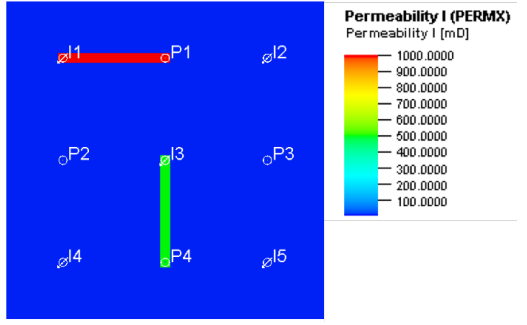

In [4]:
prod_streak = pd.read_excel('./Streak/Production_streak.xlsx')
inj_streak = pd.read_excel('./Streak/Injection_streak.xlsx')

In [5]:
inj_streak

,Date,I1,I2,I3,I4,I5
0,2016-01-01 00:00:00.000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-01-02 00:00:00.000,284.662415,1824.588013,278.588287,270.050903,769.642883
2,2016-02-01 10:19:12.026,284.674286,1824.665039,278.600098,270.062286,769.675415
3,2016-03-02 20:49:12.026,284.674286,1824.665039,278.600098,270.062286,769.675415
4,2016-04-02 07:19:12.026,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...
91,2023-07-03 08:49:06.094,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2023-08-02 19:19:48.281,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2023-09-02 05:49:06.094,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2023-10-02 16:18:23.906,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [6]:
prod_streak

,Date,P1,P2,P3,P4
0,2016-01-01 00:00:00.000,0.000000,0.000000,0.000000,0.000000
1,2016-01-02 00:00:00.000,3030.190674,180.331818,180.511932,2409.921631
2,2016-02-01 10:19:12.026,1034.125977,92.040901,254.523758,1092.091431
3,2016-03-02 20:49:12.026,1242.952759,79.237770,357.866791,1284.484741
4,2016-04-02 07:19:12.026,2894.078125,80.246880,343.474640,1714.793823
...,...,...,...,...,...
91,2023-07-03 08:49:06.094,3200.668945,261.394318,364.123749,3200.442383
92,2023-08-02 19:19:48.281,3431.033691,251.648361,397.374817,3307.727783
93,2023-09-02 05:49:06.094,3455.625732,220.472061,413.389954,3223.134277
94,2023-10-02 16:18:23.906,3679.903320,189.999924,424.907196,2884.804443


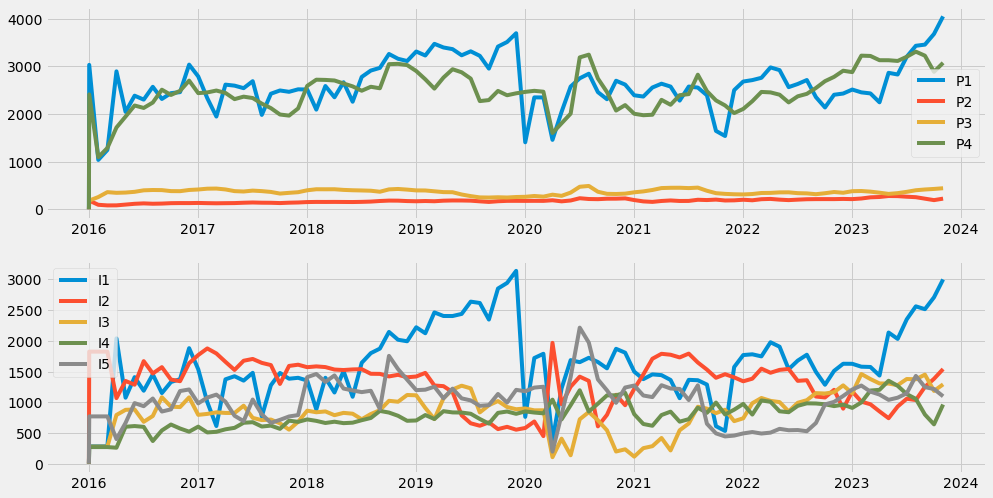

In [7]:
#plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(2,1, figsize=(15,8))
ax[0].plot(prod_streak.Date,prod_streak.P1, label='P1')
ax[0].plot(prod_streak.Date,prod_streak.P2, label='P2')
ax[0].plot(prod_streak.Date,prod_streak.P3, label='P3')
ax[0].plot(prod_streak.Date,prod_streak.P4, label='P4')
ax[0].legend()


ax[1].plot(inj_streak.Date,inj_streak.I1, label='I1')
ax[1].plot(inj_streak.Date,inj_streak.I2, label='I2')
ax[1].plot(inj_streak.Date,inj_streak.I3, label='I3')
ax[1].plot(inj_streak.Date,inj_streak.I4, label='I4')
ax[1].plot(inj_streak.Date,inj_streak.I5, label='I5')
ax[1].legend()

In [8]:
# train test split
try:
    
    inj_streak = inj_streak.drop(columns=['Date'])
except KeyError:
    inj_nonstreak
    
    
streak = pd.concat([prod_streak,inj_streak],axis=1)
streak

,Date,P1,P2,P3,P4,I1,I2,I3,I4,I5
0,2016-01-01 00:00:00.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-01-02 00:00:00.000,3030.190674,180.331818,180.511932,2409.921631,284.662415,1824.588013,278.588287,270.050903,769.642883
2,2016-02-01 10:19:12.026,1034.125977,92.040901,254.523758,1092.091431,284.674286,1824.665039,278.600098,270.062286,769.675415
3,2016-03-02 20:49:12.026,1242.952759,79.237770,357.866791,1284.484741,284.674286,1824.665039,278.600098,270.062286,769.675415
4,2016-04-02 07:19:12.026,2894.078125,80.246880,343.474640,1714.793823,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...,...,...,...,...
91,2023-07-03 08:49:06.094,3200.668945,261.394318,364.123749,3200.442383,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2023-08-02 19:19:48.281,3431.033691,251.648361,397.374817,3307.727783,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2023-09-02 05:49:06.094,3455.625732,220.472061,413.389954,3223.134277,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2023-10-02 16:18:23.906,3679.903320,189.999924,424.907196,2884.804443,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [9]:
# train size = 60%

#streak_val = streak.drop(columns=['Time days'])
train_stop = 60
train, test = streak.iloc[:train_stop,5:].values,streak.iloc[train_stop:,5:].values
streak_p1_train, streak_p1_test = streak.iloc[:train_stop,1].values,streak.iloc[train_stop:,1].values
streak_p2_train, streak_p2_test = streak.iloc[:train_stop,2].values,streak.iloc[train_stop:,2].values
streak_p3_train, streak_p3_test = streak.iloc[:train_stop,3].values,streak.iloc[train_stop:,3].values
streak_p4_train, streak_p4_test = streak.iloc[:train_stop,4].values,streak.iloc[train_stop:,4].values

In [105]:
def scaling(data):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    return data,sc

def production_preprocessing(data,train_stop,number_of_p_well = 1):
    train, test = data.iloc[:train_stop,5:].values,data.iloc[train_stop:,5:].values
    p_train,p_test = data.iloc[:train_stop,number_of_p_well].values,data.iloc[train_stop:,number_of_p_well].values
    
    x_train,y_train =np.column_stack((train,p_train)),p_train
    x_test,y_test =np.column_stack((test,p_test)),p_test
    
    x_train_scaled,x_train_sc = scaling(x_train)
    x_test_scaled,x_test_sc = scaling(x_test)
    y_test_scaled,y_test_sc = scaling(y_test.reshape(-1,1))
    y_train_scaled,y_train_sc = scaling(y_train.reshape(-1,1))
    
    
    x_train_scaled,y_train_scaled = x_train_scaled.reshape((60,1,6)), y_train_scaled.reshape(60,1,1)
    x_test_scaled,y_test_scaled = x_test_scaled.reshape((36,1,6)), y_test_scaled.reshape(36,1)
    return x_train_scaled,y_train_scaled, x_test_scaled,y_test_scaled, y_test_sc

# Non streak case

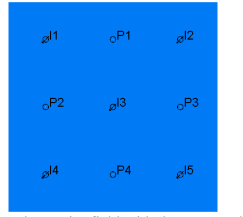

In [106]:
prod_nonstreak = pd.read_excel('./Non_Streak/Production_nonstreak.xlsx')
inj_nonstreak = pd.read_excel('./Non_Streak/Injection_nonstreak.xlsx')

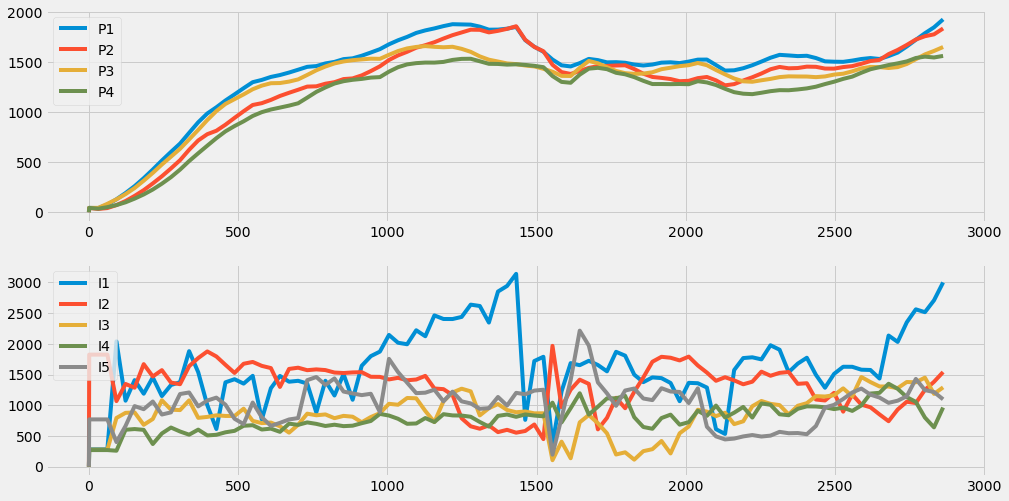

In [107]:
fig,ax = plt.subplots(2,1, figsize=(15,8))
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P1, label='P1')
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P2, label='P2')
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P3, label='P3')
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P4, label='P4')
ax[0].legend()

ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I1, label='I1')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I2, label='I2')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I3, label='I3')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I4, label='I4')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I5, label='I5')
ax[1].legend()

In [108]:
# train test split
try:
    
    inj_nonstreak = inj_nonstreak.drop(columns=['Time [days]'])
except KeyError:
    inj_nonstreak
    
    
non_streak = pd.concat([prod_nonstreak,inj_nonstreak],axis=1)
non_streak

,Time [days],P1,P2,P3,P4,I1,I2,I3,I4,I5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,42.794113,42.794086,42.794121,42.794094,284.662415,1824.588013,278.588287,270.050903,769.642883
2,31.430000,41.098396,32.640354,43.460705,34.996902,284.674286,1824.665039,278.600098,270.062286,769.675415
3,61.867500,74.807091,41.005371,83.802605,50.165264,284.674286,1824.665039,278.600098,270.062286,769.675415
4,92.305000,129.125595,71.362114,128.713333,70.953720,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...,...,...,...,...
91,2740.367432,1658.946777,1674.509155,1483.775879,1509.722290,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2770.805420,1726.047363,1728.648315,1531.512329,1543.862793,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2801.242432,1791.977295,1761.811523,1579.751099,1557.398682,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2831.679443,1850.891846,1780.687378,1614.357544,1549.049438,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [109]:
# train size = 60%

#non_streak_val = non_streak.drop(columns=['Time days'])
train_stop = 60
train, test = non_streak.iloc[:train_stop,5:].values,non_streak.iloc[train_stop:,5:].values
non_streak_p1_train, non_streak_p1_test = non_streak.iloc[:train_stop,1].values,non_streak.iloc[train_stop:,1].values
non_streak_p2_train, non_streak_p2_test = non_streak.iloc[:train_stop,2].values,non_streak.iloc[train_stop:,2].values
non_streak_p3_train, non_streak_p3_test = non_streak.iloc[:train_stop,3].values,non_streak.iloc[train_stop:,3].values
non_streak_p4_train, non_streak_p4_test = non_streak.iloc[:train_stop,4].values,non_streak.iloc[train_stop:,4].values

In [110]:
x_train_p1,y_train_p1 =np.column_stack((train,non_streak_p1_train)),non_streak_p1_train
x_train_p2,y_train_p2 =np.column_stack((train,non_streak_p2_train)),non_streak_p2_train
x_train_p3,y_train_p3 =np.column_stack((train,non_streak_p3_train)),non_streak_p3_train
x_train_p4,y_train_p4 =np.column_stack((train,non_streak_p4_train)),non_streak_p4_train


x_test_p1,y_test_p1 =np.column_stack((test,non_streak_p1_test)),non_streak_p1_test
x_test_p2,y_test_p2 =np.column_stack((test,non_streak_p2_test)),non_streak_p2_test
x_test_p3,y_test_p3 =np.column_stack((test,non_streak_p3_test)),non_streak_p3_test
x_test_p4,y_test_p4 =np.column_stack((test,non_streak_p4_test)),non_streak_p4_test

In [111]:
p1 = production_preprocessing(non_streak,train_stop,number_of_p_well = 1) 

p2 = production_preprocessing(non_streak,train_stop,number_of_p_well = 2) 

p3 = production_preprocessing(non_streak,train_stop,number_of_p_well = 3) 

p4 = production_preprocessing(non_streak,train_stop,number_of_p_well = 4) 

# Reccurent neural network

# LSTM neural network

In [154]:
params = {
    "loss": "mean_squared_error",
    "optimizer": "adam",
    "dropout": 0.4,
    "lstm_units": 90,
    "epochs": 200,
    "batch_size": 6,
    "es_patience" : 10
}


def get_model(params, input_shape):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True, input_shape=(input_shape, 6)))
    model.add(Dropout(params['dropout']))
    model.add(BatchNormalization())
    model.add(LSTM(128,return_sequences=True))
    model.add(Dropout(params['dropout']))
    model.add(BatchNormalization())
    model.add(LSTM(256,return_sequences=True))
    model.add(Dropout(params['dropout']))
    model.add(BatchNormalization())
    model.add(LSTM(256,return_sequences=True))
    model.add(LSTM(128,return_sequences=True))
    model.add(Dense(1))
    
    
    
    model.compile(loss=params["loss"],
              optimizer=params["optimizer"],
              metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
    
    

    return model

In [155]:
model1 = get_model(params=params, input_shape=p1[0].shape[1])
model2 = get_model(params=params, input_shape=p1[0].shape[1])
model3 = get_model(params=params, input_shape=p1[0].shape[1])
model4 = get_model(params=params, input_shape=p1[0].shape[1])

In [156]:
model1.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_128 (LSTM)             (None, 1, 128)            69120     
                                                                 
 dropout_96 (Dropout)        (None, 1, 128)            0         
                                                                 
 batch_normalization_12 (Bat  (None, 1, 128)           512       
 chNormalization)                                                
                                                                 
 lstm_129 (LSTM)             (None, 1, 128)            131584    
                                                                 
 dropout_97 (Dropout)        (None, 1, 128)            0         
                                                                 
 batch_normalization_13 (Bat  (None, 1, 128)           512       
 chNormalization)                                    

In [157]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', mode='min', 
patience=params["es_patience"])

# Prediction for non streak case

In [158]:
# x_train_scaled,y_train_scaled, x_test_scaled,y_test_scaled, y_test_sc

history1 = model1.fit(p1[0],p1[1], validation_data=(p1[2], p1[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) #[PlotLossesKeras



history2 = model2.fit(p2[0],p2[1], validation_data=(p2[2], p2[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 



history3 = model3.fit(p3[0],p3[1], validation_data=(p3[2], p3[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 


history4 = model4.fit(p4[0],p4[1], validation_data=(p4[2], p4[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 

Epoch 1/200
10/10 [==============================] - 13s 303ms/step - loss: 0.8226 - root_mean_squared_error: 0.9070 - mean_absolute_error: 0.6453 - val_loss: 0.9966 - val_root_mean_squared_error: 0.9983 - val_mean_absolute_error: 0.6874
Epoch 2/200
10/10 [==============================] - 0s 45ms/step - loss: 0.4633 - root_mean_squared_error: 0.6807 - mean_absolute_error: 0.4753 - val_loss: 0.9913 - val_root_mean_squared_error: 0.9956 - val_mean_absolute_error: 0.6893
Epoch 3/200
10/10 [==============================] - 0s 35ms/step - loss: 0.4571 - root_mean_squared_error: 0.6761 - mean_absolute_error: 0.5023 - val_loss: 0.9898 - val_root_mean_squared_error: 0.9949 - val_mean_absolute_error: 0.6870
Epoch 4/200
10/10 [==============================] - 0s 37ms/step - loss: 0.3335 - root_mean_squared_error: 0.5775 - mean_absolute_error: 0.4091 - val_loss: 0.9896 - val_root_mean_squared_error: 0.9948 - val_mean_absolute_error: 0.6901
Epoch 5/200
10/10 [==============================] - 0

10/10 [==============================] - 0s 41ms/step - loss: 0.1958 - root_mean_squared_error: 0.4425 - mean_absolute_error: 0.3270 - val_loss: 0.4798 - val_root_mean_squared_error: 0.6927 - val_mean_absolute_error: 0.5149
Epoch 36/200
10/10 [==============================] - 0s 39ms/step - loss: 0.2680 - root_mean_squared_error: 0.5176 - mean_absolute_error: 0.3365 - val_loss: 0.4540 - val_root_mean_squared_error: 0.6738 - val_mean_absolute_error: 0.5095
Epoch 37/200
10/10 [==============================] - 0s 40ms/step - loss: 0.2612 - root_mean_squared_error: 0.5111 - mean_absolute_error: 0.3752 - val_loss: 0.4236 - val_root_mean_squared_error: 0.6508 - val_mean_absolute_error: 0.4891
Epoch 38/200
10/10 [==============================] - 0s 38ms/step - loss: 0.2634 - root_mean_squared_error: 0.5132 - mean_absolute_error: 0.4099 - val_loss: 0.4276 - val_root_mean_squared_error: 0.6539 - val_mean_absolute_error: 0.4715
Epoch 39/200
10/10 [==============================] - 0s 39ms/ste

Epoch 70/200
10/10 [==============================] - 0s 37ms/step - loss: 0.1279 - root_mean_squared_error: 0.3576 - mean_absolute_error: 0.2809 - val_loss: 0.2017 - val_root_mean_squared_error: 0.4491 - val_mean_absolute_error: 0.2860
Epoch 71/200
10/10 [==============================] - 0s 43ms/step - loss: 0.1902 - root_mean_squared_error: 0.4362 - mean_absolute_error: 0.3246 - val_loss: 0.1988 - val_root_mean_squared_error: 0.4458 - val_mean_absolute_error: 0.2682
Epoch 72/200
10/10 [==============================] - 0s 37ms/step - loss: 0.1949 - root_mean_squared_error: 0.4415 - mean_absolute_error: 0.3546 - val_loss: 0.2066 - val_root_mean_squared_error: 0.4546 - val_mean_absolute_error: 0.3032
Epoch 73/200
10/10 [==============================] - 0s 36ms/step - loss: 0.0978 - root_mean_squared_error: 0.3128 - mean_absolute_error: 0.2443 - val_loss: 0.1501 - val_root_mean_squared_error: 0.3874 - val_mean_absolute_error: 0.2606
Epoch 74/200
10/10 [==============================] 

Epoch 21/200
10/10 [==============================] - 0s 49ms/step - loss: 0.4485 - root_mean_squared_error: 0.6697 - mean_absolute_error: 0.4973 - val_loss: 0.8255 - val_root_mean_squared_error: 0.9086 - val_mean_absolute_error: 0.7006
Epoch 22/200
10/10 [==============================] - 0s 44ms/step - loss: 0.2523 - root_mean_squared_error: 0.5022 - mean_absolute_error: 0.3906 - val_loss: 0.8027 - val_root_mean_squared_error: 0.8959 - val_mean_absolute_error: 0.6914
Epoch 23/200
10/10 [==============================] - 0s 48ms/step - loss: 0.2418 - root_mean_squared_error: 0.4918 - mean_absolute_error: 0.3764 - val_loss: 0.8053 - val_root_mean_squared_error: 0.8974 - val_mean_absolute_error: 0.6925
Epoch 24/200
10/10 [==============================] - 0s 43ms/step - loss: 0.1816 - root_mean_squared_error: 0.4262 - mean_absolute_error: 0.3396 - val_loss: 0.7453 - val_root_mean_squared_error: 0.8633 - val_mean_absolute_error: 0.6677
Epoch 25/200
10/10 [==============================] 

10/10 [==============================] - 0s 37ms/step - loss: 0.1427 - root_mean_squared_error: 0.3777 - mean_absolute_error: 0.3064 - val_loss: 0.1407 - val_root_mean_squared_error: 0.3751 - val_mean_absolute_error: 0.2943
Epoch 56/200
10/10 [==============================] - 0s 37ms/step - loss: 0.2696 - root_mean_squared_error: 0.5192 - mean_absolute_error: 0.4033 - val_loss: 0.1614 - val_root_mean_squared_error: 0.4018 - val_mean_absolute_error: 0.3080
Epoch 57/200
10/10 [==============================] - 0s 36ms/step - loss: 0.1828 - root_mean_squared_error: 0.4275 - mean_absolute_error: 0.3132 - val_loss: 0.1071 - val_root_mean_squared_error: 0.3272 - val_mean_absolute_error: 0.2356
Epoch 58/200
10/10 [==============================] - 0s 36ms/step - loss: 0.1859 - root_mean_squared_error: 0.4311 - mean_absolute_error: 0.3252 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3336 - val_mean_absolute_error: 0.2564
Epoch 59/200
10/10 [==============================] - 0s 47ms/ste

Epoch 27/200
10/10 [==============================] - 0s 48ms/step - loss: 0.2322 - root_mean_squared_error: 0.4819 - mean_absolute_error: 0.3492 - val_loss: 0.7208 - val_root_mean_squared_error: 0.8490 - val_mean_absolute_error: 0.7373
Epoch 28/200
10/10 [==============================] - 0s 38ms/step - loss: 0.1876 - root_mean_squared_error: 0.4331 - mean_absolute_error: 0.3247 - val_loss: 0.7304 - val_root_mean_squared_error: 0.8547 - val_mean_absolute_error: 0.7437
Epoch 29/200
10/10 [==============================] - 0s 35ms/step - loss: 0.3139 - root_mean_squared_error: 0.5603 - mean_absolute_error: 0.4188 - val_loss: 0.7464 - val_root_mean_squared_error: 0.8639 - val_mean_absolute_error: 0.7529
Epoch 30/200
10/10 [==============================] - 0s 34ms/step - loss: 0.3076 - root_mean_squared_error: 0.5546 - mean_absolute_error: 0.4180 - val_loss: 0.6526 - val_root_mean_squared_error: 0.8078 - val_mean_absolute_error: 0.6936
Epoch 31/200
10/10 [==============================] 

Epoch 11/200
10/10 [==============================] - 0s 36ms/step - loss: 0.3439 - root_mean_squared_error: 0.5864 - mean_absolute_error: 0.4207 - val_loss: 0.9825 - val_root_mean_squared_error: 0.9912 - val_mean_absolute_error: 0.8949
Epoch 12/200
10/10 [==============================] - 0s 35ms/step - loss: 0.2890 - root_mean_squared_error: 0.5376 - mean_absolute_error: 0.3619 - val_loss: 0.9765 - val_root_mean_squared_error: 0.9882 - val_mean_absolute_error: 0.8925
Epoch 13/200
10/10 [==============================] - 0s 32ms/step - loss: 0.3167 - root_mean_squared_error: 0.5628 - mean_absolute_error: 0.3916 - val_loss: 0.9699 - val_root_mean_squared_error: 0.9848 - val_mean_absolute_error: 0.8882
Epoch 14/200
10/10 [==============================] - 0s 48ms/step - loss: 0.2614 - root_mean_squared_error: 0.5113 - mean_absolute_error: 0.3881 - val_loss: 0.9498 - val_root_mean_squared_error: 0.9746 - val_mean_absolute_error: 0.8785
Epoch 15/200
10/10 [==============================] 

10/10 [==============================] - 0s 40ms/step - loss: 0.1614 - root_mean_squared_error: 0.4018 - mean_absolute_error: 0.3193 - val_loss: 0.5766 - val_root_mean_squared_error: 0.7594 - val_mean_absolute_error: 0.6566
Epoch 46/200
10/10 [==============================] - 0s 31ms/step - loss: 0.1682 - root_mean_squared_error: 0.4101 - mean_absolute_error: 0.3054 - val_loss: 0.4983 - val_root_mean_squared_error: 0.7059 - val_mean_absolute_error: 0.6196
Epoch 47/200
10/10 [==============================] - 0s 31ms/step - loss: 0.2673 - root_mean_squared_error: 0.5170 - mean_absolute_error: 0.3651 - val_loss: 0.1743 - val_root_mean_squared_error: 0.4175 - val_mean_absolute_error: 0.3582
Epoch 48/200
10/10 [==============================] - 0s 29ms/step - loss: 0.2244 - root_mean_squared_error: 0.4737 - mean_absolute_error: 0.3126 - val_loss: 0.1346 - val_root_mean_squared_error: 0.3669 - val_mean_absolute_error: 0.3085
Epoch 49/200
10/10 [==============================] - 0s 29ms/ste

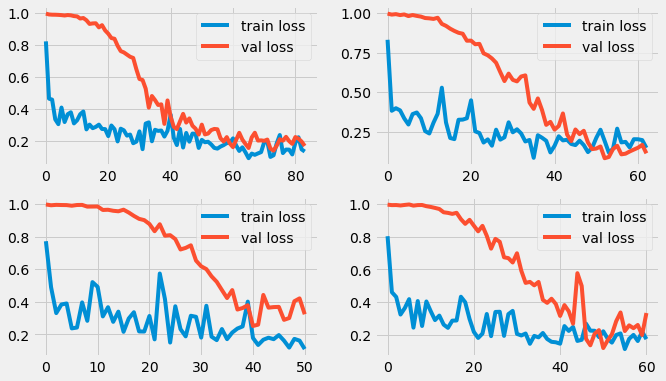

In [159]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(history1.history['loss'],label = 'train loss')
#plt.plot(history.history['mean_absolute_error']) val_loss
ax[0,0].plot(history1.history['val_loss'],label='val loss')
ax[0,0].legend()


ax[0,1].plot(history2.history['loss'],label = 'train loss')
ax[0,1].plot(history2.history['val_loss'],label='val loss')
ax[0,1].legend()

ax[1,0].plot(history3.history['loss'],label = 'train loss')
ax[1,0].plot(history3.history['val_loss'],label='val loss')
ax[1,0].legend()

ax[1,1].plot(history4.history['loss'],label = 'train loss')
ax[1,1].plot(history4.history['val_loss'],label='val loss')
ax[1,1].legend()

In [176]:
pred = model1.predict(p1[2])
pred_inv1 = p1[4].inverse_transform(pred.reshape(-1,1))

pred = model2.predict(p2[2])
pred_inv2 = p2[4].inverse_transform(pred.reshape(-1,1))

pred = model3.predict(p3[2])
pred_inv3 = p3[4].inverse_transform(pred.reshape(-1,1))

pred = model4.predict(p4[2])
pred_inv4 = p1[4].inverse_transform(pred.reshape(-1,1))

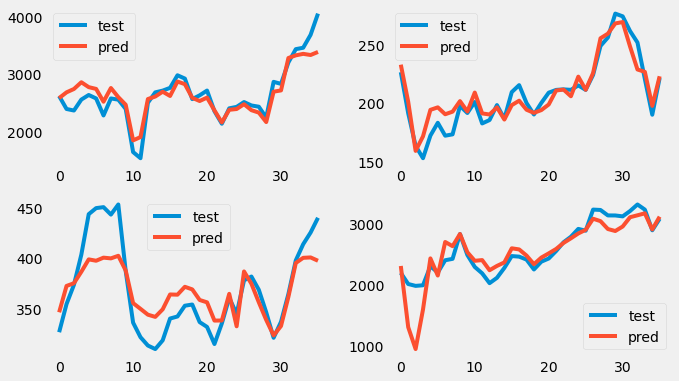

In [177]:
#y_test_p1 = sc_p1_y_test.inverse_transform(y_test_p1 .reshape(-1,1))

fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(y_test_p1,label='test')
ax[0,0].plot(pred_inv1,label='pred')
ax[0,0].grid()
ax[0,0].legend()


ax[0,1].plot(y_test_p2,label='test')
ax[0,1].plot(pred_inv2,label='pred')
ax[0,1].grid()
ax[0,1].legend()


ax[1,0].plot(y_test_p3,label='test')
ax[1,0].plot(pred_inv3,label='pred')
ax[1,0].grid()
ax[1,0].legend()


ax[1,1].plot(y_test_p4,label='test')
ax[1,1].plot(pred_inv4,label='pred')
ax[1,1].grid()
ax[1,1].legend()

In [178]:
def rmse(test,pred):
    rmse = np.sqrt(((test-pred)**2/len(test)).sum())
    return rmse

rmse_common = (rmse(y_test_p1,pred_inv1) + rmse(y_test_p2,pred_inv2)+rmse(y_test_p3,pred_inv3) + rmse(y_test_p4,pred_inv4))/4
print(rmse_common)
r2_score_com = (r2_score(y_test_p1,pred_inv1)+r2_score(y_test_p2,pred_inv2) + r2_score(y_test_p3,pred_inv3) + r2_score(y_test_p4,pred_inv4))/4
print(r2_score_com)

1994.0498466621498
0.756070365940606


In [179]:
rmse(y_test_p1,pred_inv1)

3600.0245121518983

In [180]:
rmse(y_test_p2,pred_inv2)

233.41046421320462

In [181]:
rmse(y_test_p3,pred_inv3)

302.59175986104367

In [182]:
rmse(y_test_p4,pred_inv4)

3840.172650422453

In [167]:
mean_squared_error(y_test_p1,pred_inv1)

38197.753685032665

In [168]:
rmse_common = (mean_squared_error(y_test_p1,pred_inv1) + mean_squared_error(y_test_p2,pred_inv2)+mean_squared_error(y_test_p3,pred_inv3) + mean_squared_error(y_test_p4,pred_inv4))/4
print(rmse_common)

24326.519916661822


# Prediction for streak case

In [127]:
p1 = production_preprocessing(streak,train_stop,number_of_p_well = 1) 

p2 = production_preprocessing(streak,train_stop,number_of_p_well = 2) 

p3 = production_preprocessing(streak,train_stop,number_of_p_well = 3) 

p4 = production_preprocessing(streak,train_stop,number_of_p_well = 4) 


x_train_p1,y_train_p1 =np.column_stack((train,streak_p1_train)),streak_p1_train
x_train_p2,y_train_p2 =np.column_stack((train,streak_p2_train)),streak_p2_train
x_train_p3,y_train_p3 =np.column_stack((train,streak_p3_train)),streak_p3_train
x_train_p4,y_train_p4 =np.column_stack((train,streak_p4_train)),streak_p4_train


x_test_p1,y_test_p1 =np.column_stack((test,streak_p1_test)),streak_p1_test
x_test_p2,y_test_p2 =np.column_stack((test,streak_p2_test)),streak_p2_test
x_test_p3,y_test_p3 =np.column_stack((test,streak_p3_test)),streak_p3_test
x_test_p4,y_test_p4 =np.column_stack((test,streak_p4_test)),streak_p4_test

In [128]:
model1 = get_model(params=params, input_shape=p1[0].shape[1])
model2 = get_model(params=params, input_shape=p1[0].shape[1])
model3 = get_model(params=params, input_shape=p1[0].shape[1])
model4 = get_model(params=params, input_shape=p1[0].shape[1])

In [129]:
# x_train_scaled,y_train_scaled, x_test_scaled,y_test_scaled, y_test_sc

history1 = model1.fit(p1[0],p1[1], validation_data=(p1[2], p1[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) #[PlotLossesKeras



history2 = model2.fit(p2[0],p2[1], validation_data=(p2[2], p2[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 



history3 = model3.fit(p3[0],p3[1], validation_data=(p3[2], p3[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 


history4 = model4.fit(p4[0],p4[1], validation_data=(p4[2], p4[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 

Epoch 1/200
10/10 [==============================] - 9s 215ms/step - loss: 1.0024 - root_mean_squared_error: 1.0012 - mean_absolute_error: 0.7171 - val_loss: 0.9937 - val_root_mean_squared_error: 0.9969 - val_mean_absolute_error: 0.6818
Epoch 2/200
10/10 [==============================] - 0s 22ms/step - loss: 0.9826 - root_mean_squared_error: 0.9912 - mean_absolute_error: 0.7107 - val_loss: 0.9643 - val_root_mean_squared_error: 0.9820 - val_mean_absolute_error: 0.6750
Epoch 3/200
10/10 [==============================] - 0s 22ms/step - loss: 0.9240 - root_mean_squared_error: 0.9613 - mean_absolute_error: 0.6882 - val_loss: 0.8550 - val_root_mean_squared_error: 0.9247 - val_mean_absolute_error: 0.6335
Epoch 4/200
10/10 [==============================] - 0s 20ms/step - loss: 0.6840 - root_mean_squared_error: 0.8271 - mean_absolute_error: 0.6021 - val_loss: 0.5659 - val_root_mean_squared_error: 0.7523 - val_mean_absolute_error: 0.5246
Epoch 5/200
10/10 [==============================] - 0s

Epoch 36/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - mean_absolute_error: 0.0915 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1876 - val_mean_absolute_error: 0.0945
Epoch 37/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0218 - root_mean_squared_error: 0.1477 - mean_absolute_error: 0.0955 - val_loss: 0.0353 - val_root_mean_squared_error: 0.1879 - val_mean_absolute_error: 0.1212
Epoch 38/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0225 - root_mean_squared_error: 0.1499 - mean_absolute_error: 0.1098 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1867 - val_mean_absolute_error: 0.0989
Epoch 39/200
10/10 [==============================] - 0s 20ms/step - loss: 0.0208 - root_mean_squared_error: 0.1443 - mean_absolute_error: 0.1055 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1994 - val_mean_absolute_error: 0.1100
Epoch 40/200
10/10 [==============================] 

Epoch 14/200
10/10 [==============================] - 0s 33ms/step - loss: 0.0330 - root_mean_squared_error: 0.1816 - mean_absolute_error: 0.1388 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2615 - val_mean_absolute_error: 0.1933
Epoch 15/200
10/10 [==============================] - 0s 35ms/step - loss: 0.0369 - root_mean_squared_error: 0.1921 - mean_absolute_error: 0.1421 - val_loss: 0.0616 - val_root_mean_squared_error: 0.2482 - val_mean_absolute_error: 0.1795
Epoch 16/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0537 - root_mean_squared_error: 0.2317 - mean_absolute_error: 0.1529 - val_loss: 0.0556 - val_root_mean_squared_error: 0.2358 - val_mean_absolute_error: 0.1698
Epoch 17/200
10/10 [==============================] - 0s 23ms/step - loss: 0.0374 - root_mean_squared_error: 0.1935 - mean_absolute_error: 0.1341 - val_loss: 0.0582 - val_root_mean_squared_error: 0.2413 - val_mean_absolute_error: 0.1735
Epoch 18/200
10/10 [==============================] 

10/10 [==============================] - 0s 19ms/step - loss: 0.0419 - root_mean_squared_error: 0.2048 - mean_absolute_error: 0.1477 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1437 - val_mean_absolute_error: 0.0959
Epoch 49/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0159 - root_mean_squared_error: 0.1260 - mean_absolute_error: 0.0998 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0851 - val_mean_absolute_error: 0.0613
Epoch 50/200
10/10 [==============================] - 0s 27ms/step - loss: 0.0362 - root_mean_squared_error: 0.1902 - mean_absolute_error: 0.1237 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1056 - val_mean_absolute_error: 0.0720
Epoch 51/200
10/10 [==============================] - 0s 23ms/step - loss: 0.0269 - root_mean_squared_error: 0.1640 - mean_absolute_error: 0.1179 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1708 - val_mean_absolute_error: 0.1176
Epoch 52/200
10/10 [==============================] - 0s 19ms/ste

Epoch 4/200
10/10 [==============================] - 0s 19ms/step - loss: 0.7620 - root_mean_squared_error: 0.8730 - mean_absolute_error: 0.5760 - val_loss: 0.5008 - val_root_mean_squared_error: 0.7077 - val_mean_absolute_error: 0.6158
Epoch 5/200
10/10 [==============================] - 0s 20ms/step - loss: 0.3033 - root_mean_squared_error: 0.5507 - mean_absolute_error: 0.3753 - val_loss: 0.0926 - val_root_mean_squared_error: 0.3043 - val_mean_absolute_error: 0.2568
Epoch 6/200
10/10 [==============================] - 0s 19ms/step - loss: 0.2265 - root_mean_squared_error: 0.4759 - mean_absolute_error: 0.3032 - val_loss: 0.0698 - val_root_mean_squared_error: 0.2643 - val_mean_absolute_error: 0.1856
Epoch 7/200
10/10 [==============================] - 0s 19ms/step - loss: 0.2263 - root_mean_squared_error: 0.4758 - mean_absolute_error: 0.2840 - val_loss: 0.1088 - val_root_mean_squared_error: 0.3298 - val_mean_absolute_error: 0.2837
Epoch 8/200
10/10 [==============================] - 0s 

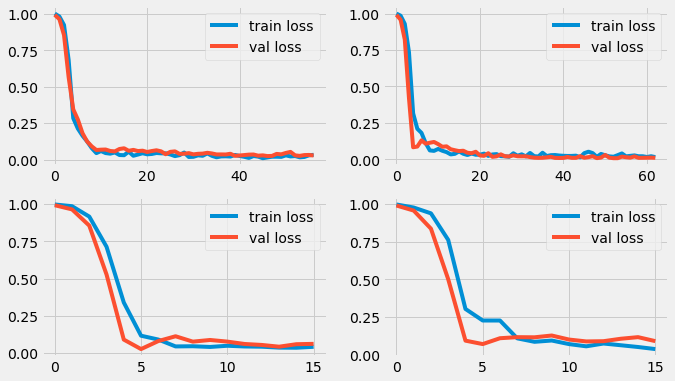

In [130]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(history1.history['loss'],label = 'train loss')
#plt.plot(history.history['mean_absolute_error']) val_loss
ax[0,0].plot(history1.history['val_loss'],label='val loss')
ax[0,0].legend()


ax[0,1].plot(history2.history['loss'],label = 'train loss')
ax[0,1].plot(history2.history['val_loss'],label='val loss')
ax[0,1].legend()

ax[1,0].plot(history3.history['loss'],label = 'train loss')
ax[1,0].plot(history3.history['val_loss'],label='val loss')
ax[1,0].legend()

ax[1,1].plot(history4.history['loss'],label = 'train loss')
ax[1,1].plot(history4.history['val_loss'],label='val loss')
ax[1,1].legend()

In [131]:
pred = model1.predict(p1[2])
pred_inv1 = p1[4].inverse_transform(pred.reshape(-1,1))

pred = model2.predict(p2[2])
pred_inv2 = p2[4].inverse_transform(pred.reshape(-1,1))

pred = model3.predict(p3[2])
pred_inv3 = p3[4].inverse_transform(pred.reshape(-1,1))

pred = model4.predict(p4[2])
pred_inv4 = p4[4].inverse_transform(pred.reshape(-1,1))

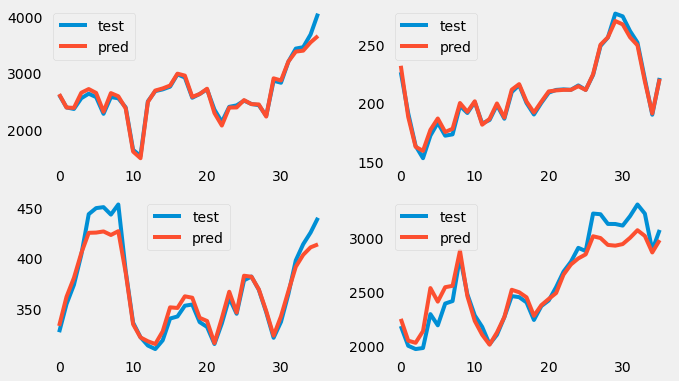

In [132]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(y_test_p1,label='test')
ax[0,0].plot(pred_inv1,label='pred')
ax[0,0].grid()
ax[0,0].legend()


ax[0,1].plot(y_test_p2,label='test')
ax[0,1].plot(pred_inv2,label='pred')
ax[0,1].grid()
ax[0,1].legend()


ax[1,0].plot(y_test_p3,label='test')
ax[1,0].plot(pred_inv3,label='pred')
ax[1,0].grid()
ax[1,0].legend()


ax[1,1].plot(y_test_p4,label='test')
ax[1,1].plot(pred_inv4,label='pred')
ax[1,1].grid()
ax[1,1].legend()


In [133]:
rmse(y_test_p2,pred_inv2)

242.76748818911483

In [134]:
y_test_p2

array([226.3079834 , 191.2504425 , 163.42793274, 152.90989685,
       172.19335938, 183.12289429, 172.13076782, 173.25961304,
       197.55158997, 191.49095154, 200.86398315, 182.57246399,
       185.48455811, 198.24235535, 186.60462952, 209.32241821,
       215.27835083, 199.98606873, 190.20433044, 200.09783936,
       208.84860229, 211.18844604, 211.65866089, 211.24963379,
       215.00749207, 211.22550964, 223.98025513, 248.71740723,
       255.9223938 , 276.30844116, 273.9772644 , 261.39431763,
       251.64836121, 220.47206116, 189.99992371, 221.39825439])

In [135]:
rmse(y_test_p1,pred_inv1)

3927.800241084572

In [136]:
rmse(y_test_p2,pred_inv2)

242.76748818911483

In [137]:
rmse(y_test_p3,pred_inv3)

341.5963552155216

In [138]:
rmse(y_test_p4,pred_inv4)

3203.0690609479802

In [36]:
rmse_common = (rmse(y_test_p1,pred_inv1) + rmse(y_test_p2,pred_inv2)+rmse(y_test_p3,pred_inv3) + rmse(y_test_p4,pred_inv4))/4
print(rmse_common)
r2_score_com = (r2_score(y_test_p1,pred_inv1)+r2_score(y_test_p2,pred_inv2) + r2_score(y_test_p3,pred_inv3) + r2_score(y_test_p4,pred_inv4))/4
print(r2_score_com)

1938.0371487964494
0.9632967393763733


In [37]:
rmse_common = (mean_squared_error(y_test_p1,pred_inv1) + mean_squared_error(y_test_p2,pred_inv2)+mean_squared_error(y_test_p3,pred_inv3) + mean_squared_error(y_test_p4,pred_inv4))/4
print(rmse_common)

3312.5552071754655


In [38]:
rmse(y_test_p1,pred_inv1)

3765.0868433524092